<a href="https://colab.research.google.com/github/kiitaamuuraa/Asobiba/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Nearest Neighbors Classification

Sample usage of Nearest Neighbors classification.
It will plot the decision boundaries for each class.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
dataset = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


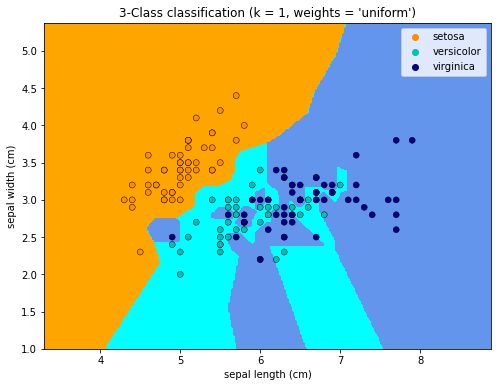

In [ ]:
for n_neighbors in range(1, 6, 5):
    weights = "uniform" #weights in ["uniform", "distance"]
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

In [ ]:
for n_neighbors in range(1, 1 + len(X_train)):
    weights = "uniform" #weights in ["uniform", "distance"]
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print(n_neighbors, ": ", f1_score(y_test, y_pred, average='macro'))

1 :  0.6666666666666666
2 :  0.6930946291560103
3 :  0.8329156223893066
4 :  0.6930946291560103
5 :  0.7979797979797979
6 :  0.8000000000000002
7 :  0.7660818713450293
8 :  0.797979797979798
9 :  0.8000000000000002
10 :  0.797979797979798
11 :  0.7660818713450293
12 :  0.7660818713450291
13 :  0.7660818713450293
14 :  0.7660818713450293
15 :  0.8294970161977835
16 :  0.8329156223893066
17 :  0.8534798534798534
18 :  0.7660818713450293
19 :  0.8222222222222223
20 :  0.7660818713450293
21 :  0.7916666666666666
22 :  0.8294970161977835
23 :  0.8294970161977835
24 :  0.8653198653198654
25 :  0.8653198653198654
26 :  0.8653198653198654
27 :  0.8653198653198654
28 :  0.8653198653198654
29 :  0.8653198653198654
30 :  0.899749373433584
31 :  0.9305555555555555
32 :  0.8653198653198654
33 :  0.8933333333333334
34 :  0.8933333333333334
35 :  0.8933333333333334
36 :  0.8976982097186701
37 :  0.8976982097186701
38 :  0.8976982097186701
39 :  0.8976982097186701
40 :  0.8976982097186701
41 :  0.8976

In [ ]:
a = np.array([2,3,4])
b = np.array([2,3,4])
np.matmul(a, b) == a@b ==np.dot(a, b)

True

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)

for avg in ['macro', 'micro', 'weighted']:
    print(f1_score(y_test, y_pred, average=avg))

0.6666666666666666
0.6666666666666666
0.6666666666666666
